# Exploración del dataset Chickenpox
En este notebook se realizará la exploración del dataset **Chickenpox** de **PyTorch Geometric Temporal**.
---
## Estrcutura del dataset
1. **Nodos:** Distritos de Hungría.
2. **Aristas:** Proximidad geográfica de los distritos.
3. **Tiempo:** Cada snapshot es una 1 semana de datos.

In [1]:
!pip install torch-geometric-temporal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Importamos el dataset Chickenpox
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader

# Realizamos carga del mismo
loader = ChickenpoxDatasetLoader()
dataset = loader.get_dataset()
snapshot = dataset[3]

# Imprimimos 
print("Número de nodos:", snapshot.x.shape[0])  
print("Número de snapshots:", len(dataset.targets))
print("Número de aristas:", snapshot.edge_index.shape[1]) 
print("Features (lags):", snapshot.x.shape[1])  
print("Target shape:", snapshot.y.shape) 

Número de nodos: 20
Número de snapshots: 517
Número de aristas: 102
Features (lags): 4
Target shape: torch.Size([20])


In [3]:
import pandas as pd
import geopandas as gpd

# Crear lista para acumular los datos
rows = []
snapshot = dataset

# Recorremos los snapshot y extraemos sus datoos (semana, distrito, casos)
for t, snapshot in enumerate(dataset): 
    y_values = snapshot.y.numpy()
    for district_id, cases in enumerate(y_values):
        rows.append({
            "week": t,
            "district_id": district_id,
            "cases": cases
        })

# Convertimos a DataFrame
df = pd.DataFrame(rows)

# Ver primeras filas
print(df.shape)
print(df.head())

# Podemos filtrar por distritos
budapest = df[df["district_id"] == 19]
print(budapest.head())

#Podemos filtrar por semanas
week_20 = df[df["week"]==20]
print(week_20.head())


#Top 5 distritos en la semana 20:

#top_week20 = (df_long[df_long["week"] == 20]
#              .sort_values(by="cases", ascending=False)
#              .head(5))
#print(top_week20)




(10340, 3)
   week  district_id     cases
0     0            0  0.710566
1     0            1 -0.072469
2     0            2  2.609944
3     0            3  1.787042
4     0            4  0.802413
    week  district_id     cases
19     0           19  0.003589
39     1           19  0.438445
59     2           19 -0.692181
79     3           19 -0.518239
99     4           19  0.525417
     week  district_id     cases
400    20            0  1.748384
401    20            1 -0.598430
402    20            2 -0.948854
403    20            3 -1.279368
404    20            4 -0.885237


# Normalizando los datos
En esta sección quiero saber cuales son los nombres de los nodos distritos, para ello importo una csv con el id y nombre de los distritos que se usaron para este dataset de **ChickenPox**.

In [4]:
# Tenemos aquí dos datasets.
# El primero es el datset de los distritos de Hungría con información geográfica.
gdf = gpd.read_file("/kaggle/input/distrito-hungria/gadm41_HUN_1.json")

# El segundo es un datset simple, con el id y nombre de los distritos usados en Chickenpox
id_name_district = pd.read_csv("/kaggle/input/name-district/id_name_district.csv")

print(id_name_district.head())

# Agregamos los nombres de cada distrito al dataframe 
df = df.merge(id_name_district, on="district_id", how="left")
print(df.head())

print(gdf["NAME_1"].unique())



   district_id         district_name
0            0           Bács-Kiskun
1            1               Baranya
2            2                 Békés
3            3  Borsod-Abaúj-Zemplén
4            4              Csongrád
   week  district_id     cases         district_name
0     0            0  0.710566           Bács-Kiskun
1     0            1 -0.072469               Baranya
2     0            2  2.609944                 Békés
3     0            3  1.787042  Borsod-Abaúj-Zemplén
4     0            4  0.802413              Csongrád
['Bács-Kiskun' 'Baranya' 'Békés' 'Borsod-Abaúj-Zemplén' 'Budapest'
 'Csongrád' 'Fejér' 'Gyor-Moson-Sopron' 'Hajdú-Bihar' 'Heves'
 'Jász-Nagykun-Szolnok' 'Komárom-Esztergom' 'Nógrád' 'Pest' 'Somogy'
 'Szabolcs-Szatmár-Bereg' 'Tolna' 'Vas' 'Veszprém' 'Zala']


        GID_1 GID_0  COUNTRY                NAME_1           VARNAME_1  \
0     HUN.1_1   HUN  Hungary           Bács-Kiskun  Bacs-Bodrog-Kiskun   
517   HUN.2_1   HUN  Hungary               Baranya                  NA   
1034  HUN.3_1   HUN  Hungary                 Békés                  NA   
1551  HUN.4_1   HUN  Hungary  Borsod-Abaúj-Zemplén                  NA   
2068  HUN.5_1   HUN  Hungary              Budapest           Budapeste   

     NL_NAME_1   TYPE_1    ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0           NA    Megye       County   NA  HU.BK     NA   
517         NA    Megye       County   NA  HU.BA  HU-BA   
1034        NA    Megye       County   NA  HU.BE     NA   
1551        NA    Megye       County   NA  HU.BZ     NA   
2068        NA  Fovaros  CapitalCity   NA  HU.BU  HU-BU   

                                               geometry  week  district_id  \
0     MULTIPOLYGON (((19.50790 46.14840, 19.50180 46...     0            0   
517   MULTIPOLYGON (((17.99050 45.80030, 17.

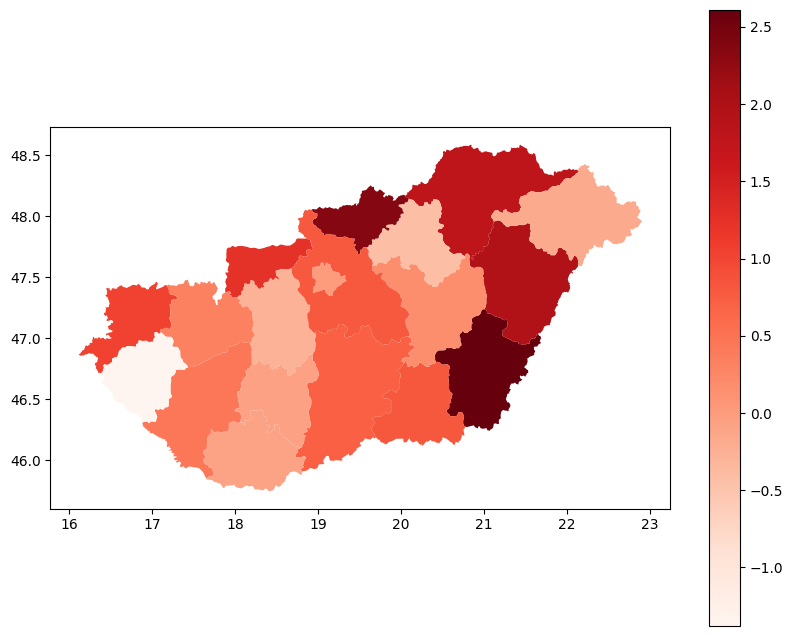

In [5]:
import matplotlib.pyplot as plt 
df_district = gdf.merge(df, left_on="NAME_1", right_on="district_name", how="inner")

df_district_week_0 = df_district[df_district["week"]==0]
df_district_week_0.plot(column="cases", cmap="Reds", legend=True, figsize=(10,8))
print(df_district_week_0.head())

In [6]:
print(snapshot.edge_index)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,
          3,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
         13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17,
         17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19],
        [10,  6, 13,  1,  0,  5, 16,  0, 16,  1, 14, 10,  8,  2,  5,  8, 15, 12,
          9, 10,  3,  4, 13,  0, 10,  2,  5,  0, 16,  6, 14, 13, 11, 18,  7, 17,
         11, 18,  3,  2, 15,  8, 10,  9, 13,  3, 12, 10,  5,  9,  8,  3, 10,  2,
         13,  0,  6, 11,  7, 13, 18,  3,  9, 13, 12, 13,  9,  6,  4, 12,  0, 11,
         10, 18, 19,  1, 14,  6, 16,  3, 15,  8, 16, 14,  1,  0,  6,  7, 19, 17,
         18, 14, 18, 17,  7,  6, 19, 11, 18, 14, 19, 17]])
